**KNN**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


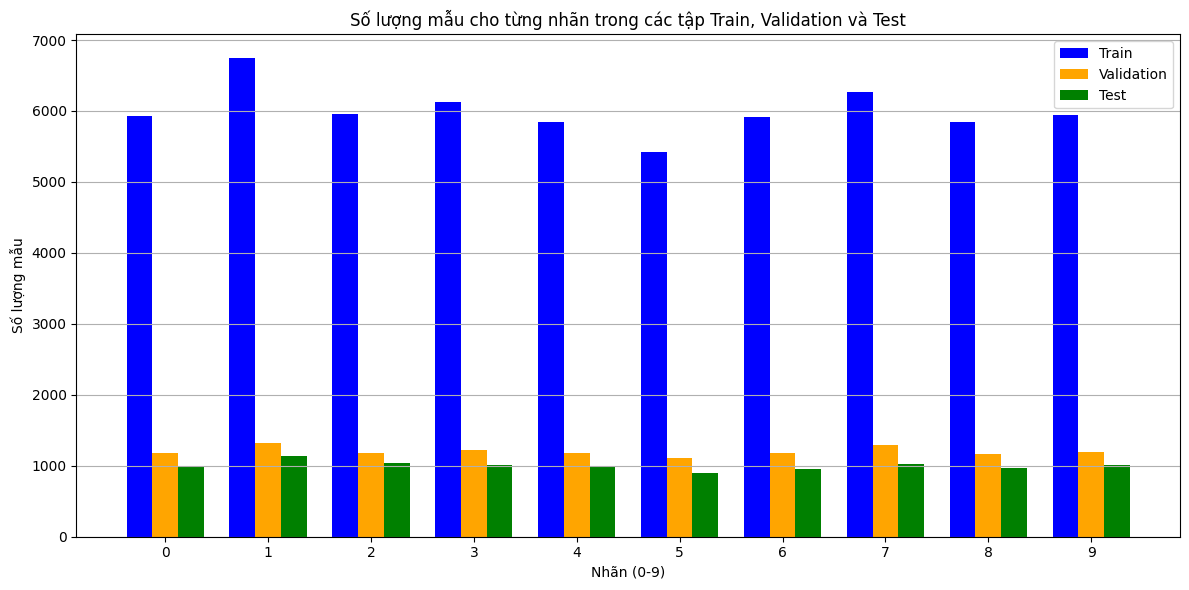

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Tải dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Chia dữ liệu huấn luyện thành tập con cho cross-validation
x_train_subset, x_val, y_train_subset, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Hàm đếm số mẫu cho mỗi nhãn
def count_labels(y):
    unique, counts = np.unique(y, return_counts=True)
    return dict(zip(unique, counts))

# Đếm số lượng mẫu cho từng nhãn trong các tập dữ liệu
train_counts = count_labels(y_train)
val_counts = count_labels(y_val)
test_counts = count_labels(y_test)

# Tạo biểu đồ
labels = range(10)  # Nhãn từ 0 đến 9
train_values = [train_counts.get(i, 0) for i in labels]
val_values = [val_counts.get(i, 0) for i in labels]
test_values = [test_counts.get(i, 0) for i in labels]

x = np.arange(len(labels))  # vị trí cho các nhãn

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
bar_width = 0.25

plt.bar(x - bar_width, train_values, width=bar_width, label='Train', color='blue')
plt.bar(x, val_values, width=bar_width, label='Validation', color='orange')
plt.bar(x + bar_width, test_values, width=bar_width, label='Test', color='green')

plt.xlabel('Nhãn (0-9)')
plt.ylabel('Số lượng mẫu')
plt.title('Số lượng mẫu cho từng nhãn trong các tập Train, Validation và Test')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

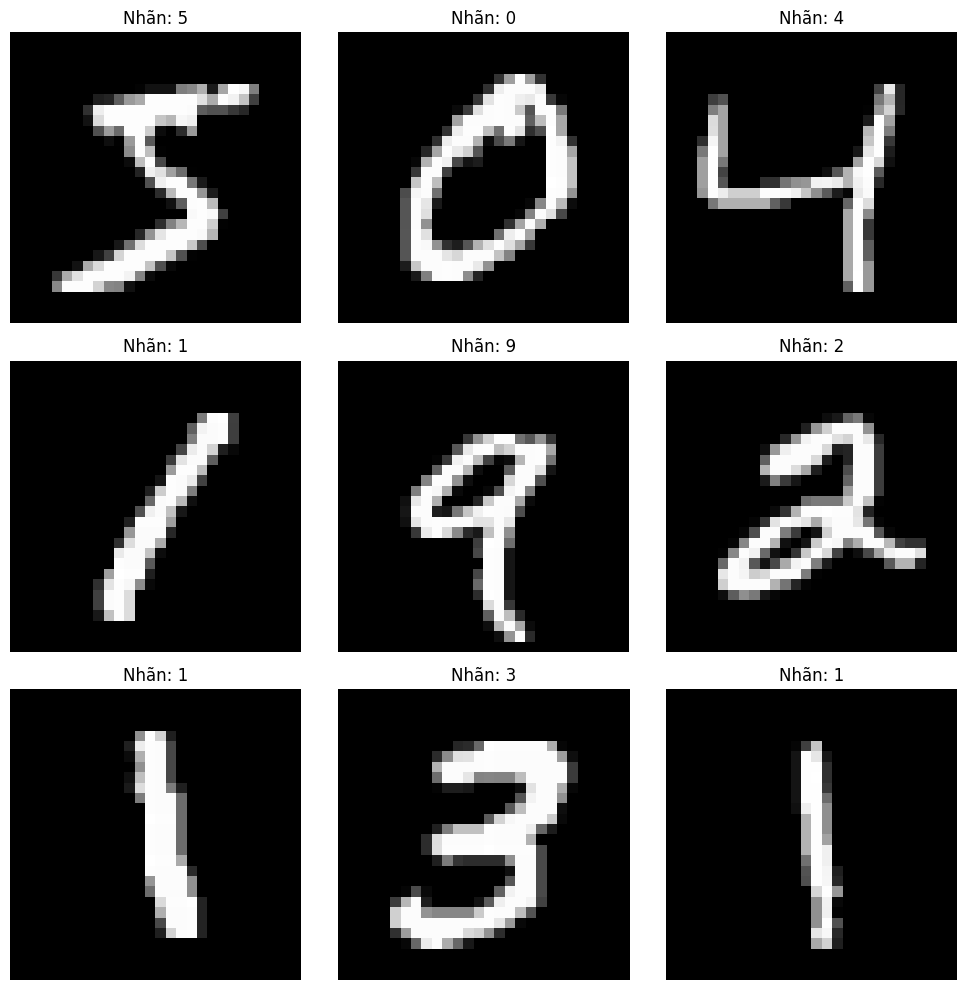

Số lượng mẫu trong tập huấn luyện:
Nhãn 0: 5923 mẫu
Nhãn 1: 6742 mẫu
Nhãn 2: 5958 mẫu
Nhãn 3: 6131 mẫu
Nhãn 4: 5842 mẫu
Nhãn 5: 5421 mẫu
Nhãn 6: 5918 mẫu
Nhãn 7: 6265 mẫu
Nhãn 8: 5851 mẫu
Nhãn 9: 5949 mẫu

Số lượng mẫu trong tập xác thực:
Nhãn 0: 1175 mẫu
Nhãn 1: 1322 mẫu
Nhãn 2: 1174 mẫu
Nhãn 3: 1219 mẫu
Nhãn 4: 1176 mẫu
Nhãn 5: 1104 mẫu
Nhãn 6: 1177 mẫu
Nhãn 7: 1299 mẫu
Nhãn 8: 1160 mẫu
Nhãn 9: 1194 mẫu

Số lượng mẫu trong tập kiểm tra:
Nhãn 0: 980 mẫu
Nhãn 1: 1135 mẫu
Nhãn 2: 1032 mẫu
Nhãn 3: 1010 mẫu
Nhãn 4: 982 mẫu
Nhãn 5: 892 mẫu
Nhãn 6: 958 mẫu
Nhãn 7: 1028 mẫu
Nhãn 8: 974 mẫu
Nhãn 9: 1009 mẫu


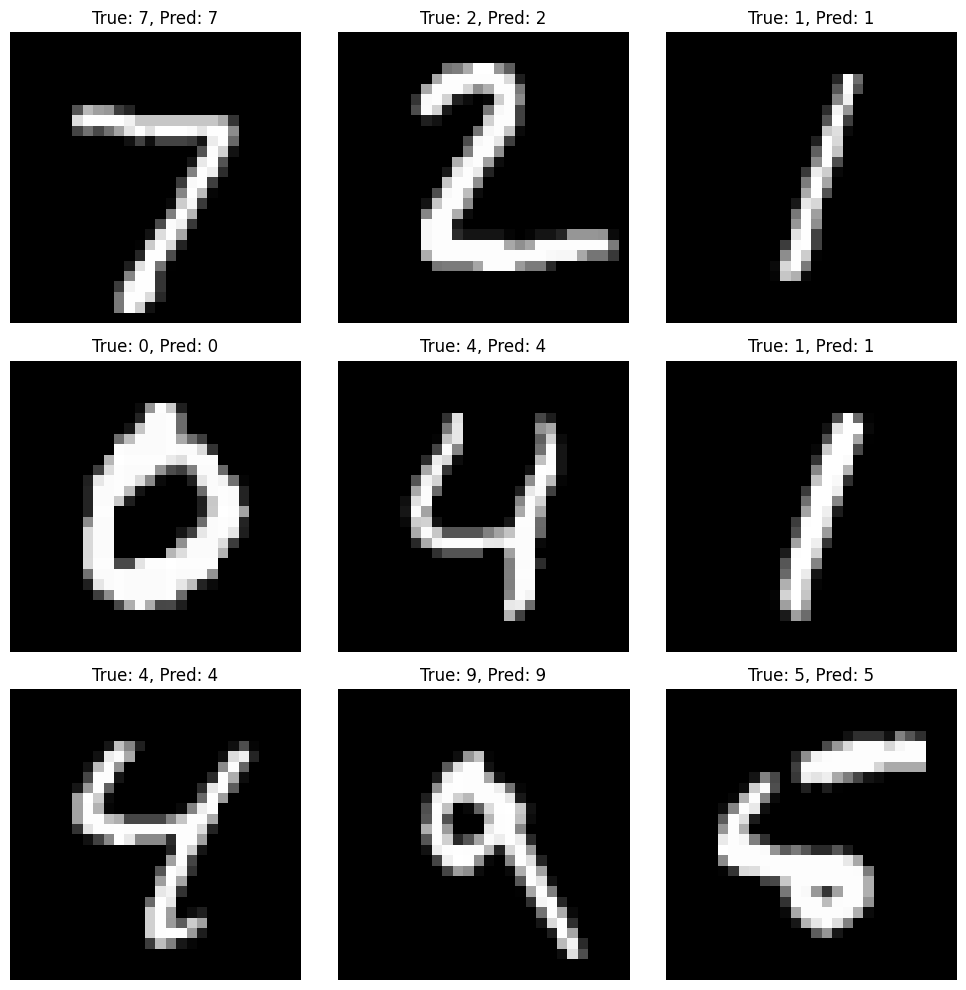

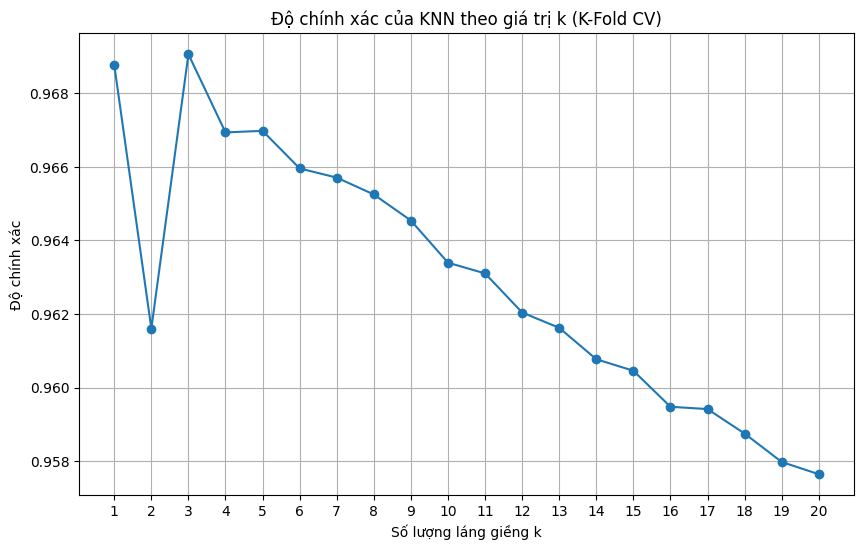


Thông số của các tập dữ liệu:
Tập huấn luyện: 60000 mẫu, 28 đặc trưng
Tập xác thực: 12000 mẫu, 784 đặc trưng
Tập kiểm tra: 10000 mẫu, 28 đặc trưng


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Tải dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Hiển thị một số hình ảnh trong tập huấn luyện
def show_images(x, y, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x[i], cmap='gray')
        plt.title(f'Nhãn: {y[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images(x_train, y_train)

# Làm phẳng các hình ảnh
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Chia tỷ lệ dữ liệu về khoảng [0, 1]
x_train_flat = x_train_flat.astype('float32') / 255.0
x_test_flat = x_test_flat.astype('float32') / 255.0

# Chia dữ liệu huấn luyện thành tập con cho cross-validation
x_train_subset, x_val, y_train_subset, y_val = train_test_split(x_train_flat, y_train, test_size=0.2, random_state=42)

# Thông tin về số lượng mẫu cho từng nhãn
def print_label_statistics(y):
    unique, counts = np.unique(y, return_counts=True)
    label_stats = dict(zip(unique, counts))
    for label, count in label_stats.items():
        print(f'Nhãn {label}: {count} mẫu')

print("Số lượng mẫu trong tập huấn luyện:")
print_label_statistics(y_train)

print("\nSố lượng mẫu trong tập xác thực:")
print_label_statistics(y_val)

print("\nSố lượng mẫu trong tập kiểm tra:")
print_label_statistics(y_test)

# Danh sách để lưu độ chính xác cho từng k
k_values = range(1, 21)
accuracies = []

# Thử nghiệm với các giá trị k
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # Áp dụng k-fold cross-validation
    cv_scores = cross_val_score(knn_model, x_train_subset, y_train_subset, cv=5)  # 5-fold cross-validation
    accuracies.append(cv_scores.mean())  # Lưu độ chính xác trung bình

# Dự đoán trên tập kiểm tra với giá trị k tốt nhất
best_k = k_values[np.argmax(accuracies)]
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(x_train_subset, y_train_subset)
y_pred = knn_model.predict(x_test_flat)

# Hiển thị một số dự đoán
def show_predictions(x, y_true, y_pred, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x[i], cmap='gray')
        plt.title(f'True: {y_true[i]}, Pred: {y_pred[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(x_test, y_test, y_pred)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Độ chính xác của KNN theo giá trị k (K-Fold CV)')
plt.xlabel('Số lượng láng giềng k')
plt.ylabel('Độ chính xác')
plt.xticks(k_values)
plt.grid()
plt.show()

# Thông số của các dữ liệu
print(f'\nThông số của các tập dữ liệu:')
print(f'Tập huấn luyện: {x_train.shape[0]} mẫu, {x_train.shape[1]} đặc trưng')
print(f'Tập xác thực: {x_val.shape[0]} mẫu, {x_val.shape[1]} đặc trưng')
print(f'Tập kiểm tra: {x_test.shape[0]} mẫu, {x_test.shape[1]} đặc trưng')

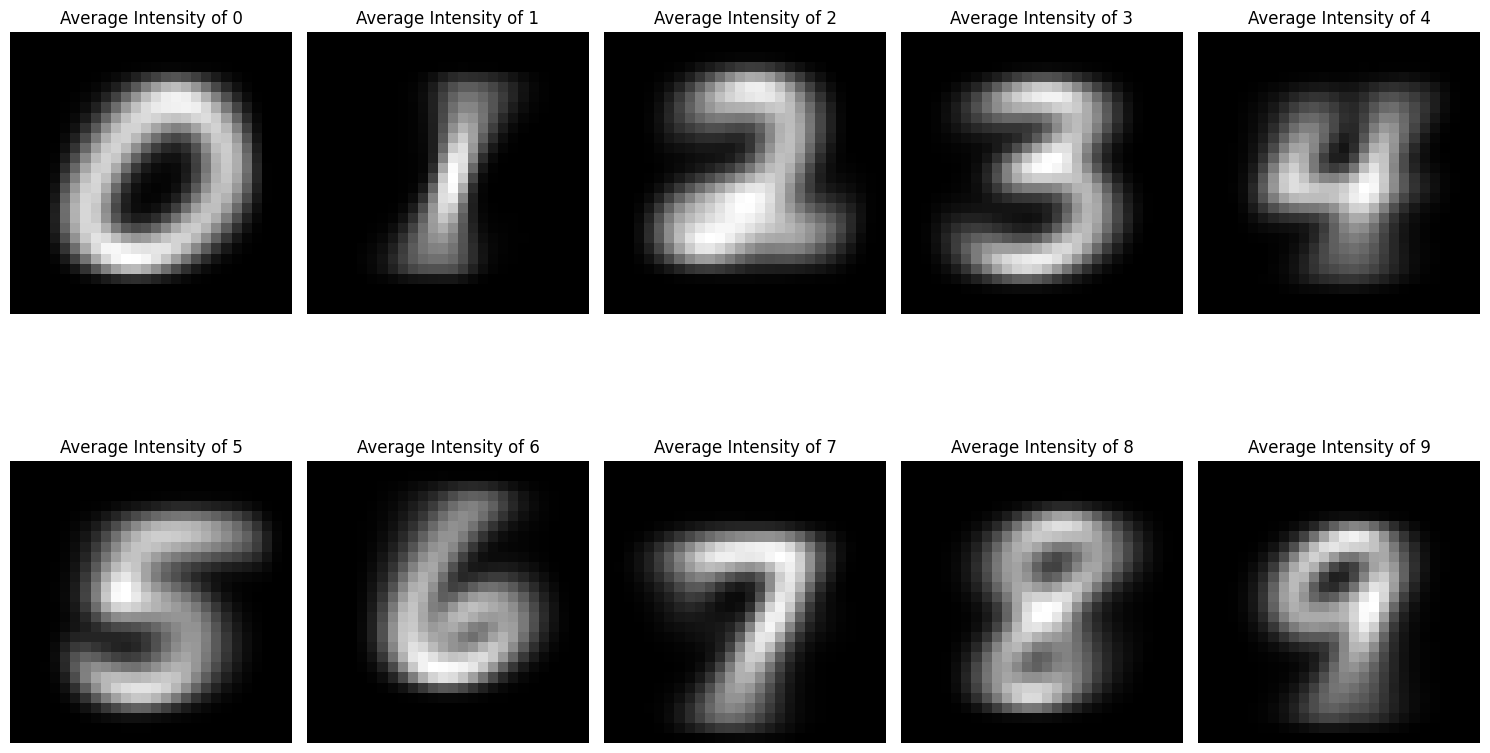

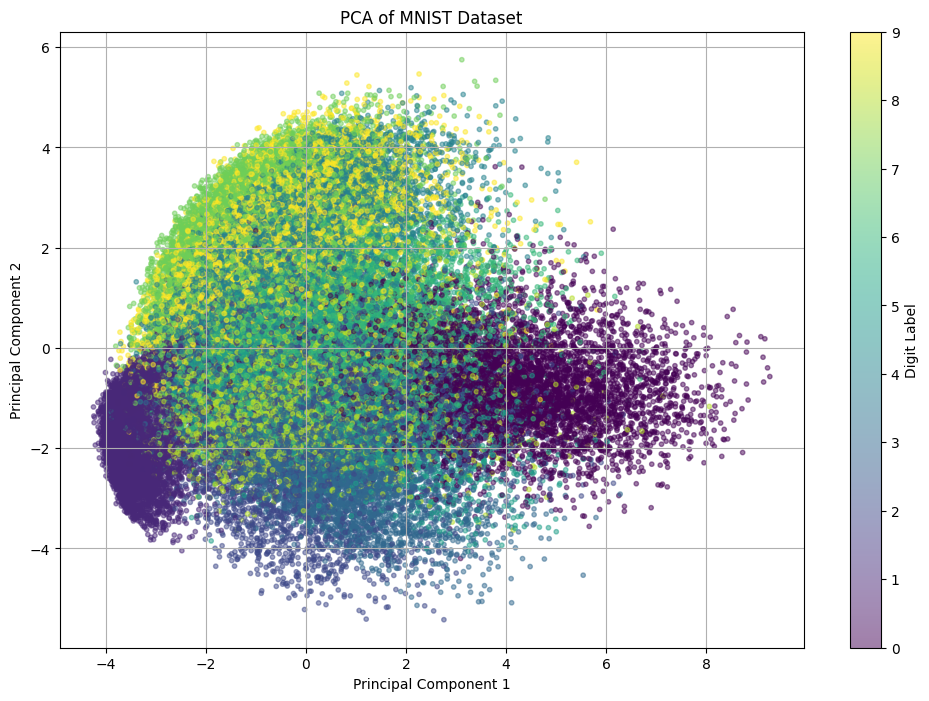

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA

# Tải dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Làm phẳng các hình ảnh và chia tỷ lệ dữ liệu về khoảng [0, 1]
x_train_flat = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255.0

# Tính toán trung bình pixel cho mỗi chữ số (0-9)
def calculate_average_intensity(x, y):
    average_intensity = {}
    for digit in range(10):
        # Lấy tất cả các hình ảnh cho chữ số hiện tại
        images = x[y == digit]
        # Tính trung bình pixel cho các hình ảnh
        average_intensity[digit] = np.mean(images, axis=0)
    return average_intensity

average_intensity = calculate_average_intensity(x_train_flat, y_train)

# Hiển thị trung bình pixel cho mỗi chữ số
plt.figure(figsize=(15, 10))
for digit, intensity in average_intensity.items():
    plt.subplot(2, 5, digit + 1)
    plt.imshow(intensity.reshape(28, 28), cmap='gray')
    plt.title(f'Average Intensity of {digit}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Sử dụng PCA để giảm chiều dữ liệu xuống 2D
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_flat)

# Vẽ biểu đồ phân tán các điểm dữ liệu trong không gian 2D
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5, s=10)
plt.colorbar(scatter, label='Digit Label')
plt.title('PCA of MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

**SVM**

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 7.8min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.8min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.7min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.9min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 9.4min
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time= 6.6min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 1.8min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 4.3min
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 3.4min
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 3.4min
[CV] END .......................C=1, gamma=auto, kernel=poly; total time= 2.9min
[CV] END .......................C=1, gamma=auto, kernel=poly; total time= 2.9min
[CV] END ...................

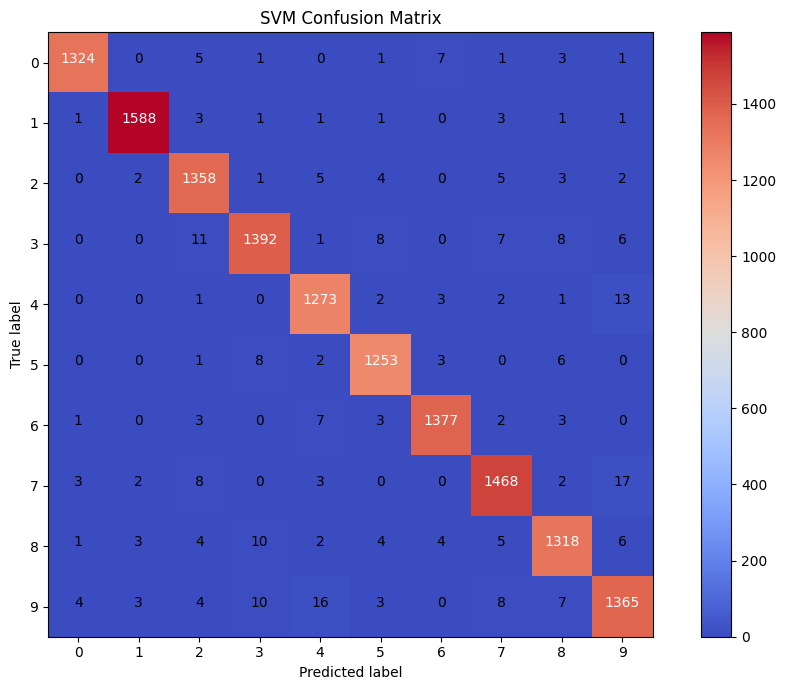

SVM Time taken for training: 19174.75 seconds
SVM Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=12.2min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 9.5min
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time= 7.0min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 1.5min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 4.3min
[CV] END ......................C=1, gamma=scale, kernel=poly; total time= 5.5min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time= 5.8min
[CV] END .......................C=1, gamma=auto, kernel=poly; total time= 3.0min
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time= 3.8min
[CV] END .....................C=10, gamma=scale, kernel=poly; total time= 3.1min
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=16.

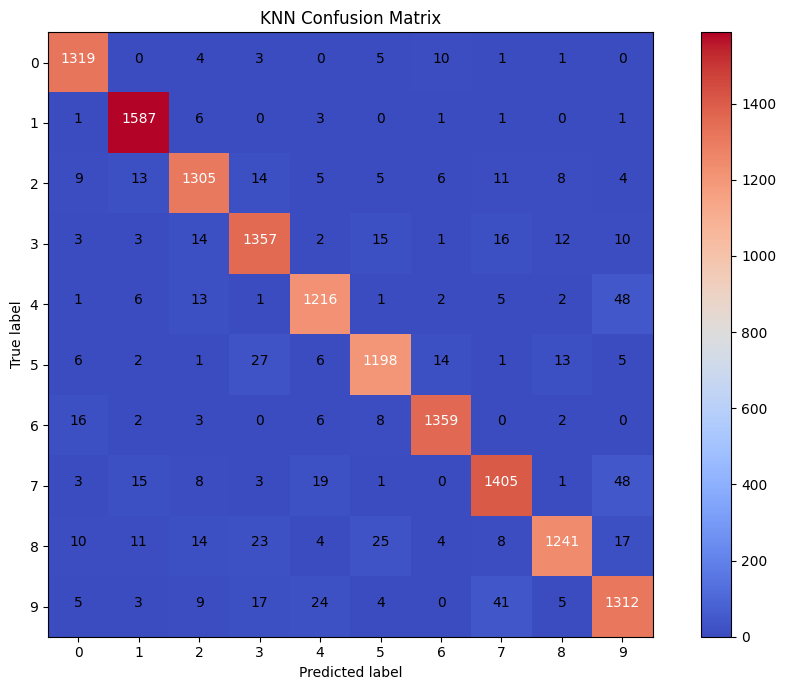

KNN Best k: 3
KNN Time taken for training: 19174.75 seconds
SVM Accuracy: 0.9797
KNN Accuracy: 0.9499


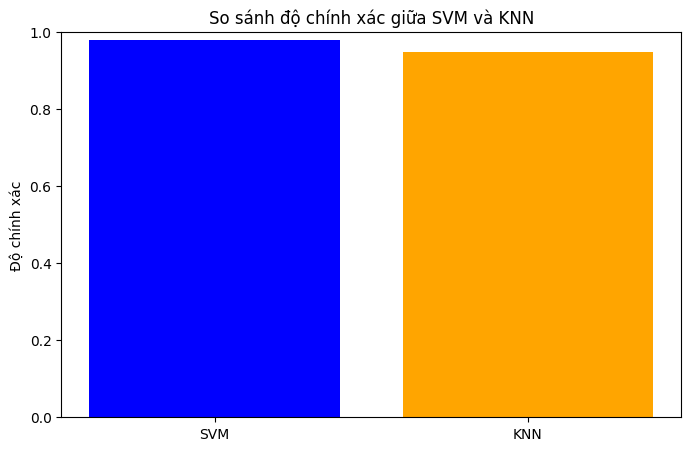

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import time

# Bước 1: Tải dữ liệu MNIST
mnist = datasets.fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

# Bước 2: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bước 3: Tiền xử lý dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Bước 4: Giảm chiều dữ liệu với PCA
pca = PCA(n_components=0.95)  # Giữ lại 95% biến thiên
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Bước 5: Tìm kiếm tham số tối ưu với GridSearchCV cho SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly', 'linear']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=StratifiedKFold(n_splits=3), verbose=2, n_jobs=-1)
start_time_svm = time.time()
grid_search.fit(X_train, y_train)
end_time_svm = time.time()

# Bước 6: Huấn luyện mô hình tốt nhất
best_svm_model = grid_search.best_estimator_

# Bước 7: Dự đoán và đánh giá mô hình SVM
y_pred_svm = best_svm_model.predict(X_test)

# Bước 8: In báo cáo phân loại cho SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Bước 9: Hiển thị ma trận nhầm lẫn cho SVM với thông số
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap='coolwarm')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)

    # Thêm thông số vào từng ô
    thresh = cm.max() / 2
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, f'{cm[i, j]}', horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Hiển thị ma trận nhầm lẫn cho SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(conf_matrix_svm, title='SVM Confusion Matrix')

# Bước 10: In thời gian huấn luyện cho SVM
print(f'SVM Time taken for training: {end_time_svm - start_time_svm:.2f} seconds')
print(f'SVM Best parameters: {grid_search.best_params_}')

# Bước 11: Huấn luyện mô hình KNN
k_values = range(1, 21)
accuracies_knn = []

# Thử nghiệm với các giá trị k
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracies_knn.append(accuracy)

# Bước 12: Dự đoán và đánh giá mô hình KNN
best_k = k_values[np.argmax(accuracies_knn)]
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Bước 13: In báo cáo phân loại cho KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Bước 14: Hiển thị ma trận nhầm lẫn cho KNN với thông số
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(conf_matrix_knn, title='KNN Confusion Matrix')

# Bước 15: In thời gian huấn luyện cho KNN
print(f'KNN Best k: {best_k}')
print(f'KNN Time taken for training: {end_time_svm - start_time_svm:.2f} seconds')

# Bước 16: So sánh hiệu suất giữa SVM và KNN
svm_accuracy = accuracy_score(y_test, y_pred_svm)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print(f'SVM Accuracy: {svm_accuracy:.4f}')
print(f'KNN Accuracy: {knn_accuracy:.4f}')

# Bước 17: Vẽ biểu đồ so sánh độ chính xác
models = ['SVM', 'KNN']
accuracies = [svm_accuracy, knn_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.title('So sánh độ chính xác giữa SVM và KNN')
plt.ylabel('Độ chính xác')
plt.ylim(0, 1)
plt.show()